## Testing 5s runs vs morotti supplement 


Mouse
<code>
python runShannonTest.py -dt 0.1 -stim 999 -jit -T 5000 -odeName shannon_2004_mouse.ode -name mouse_5.pickle
</code>

Rabbit
<code>
python runShannonTest.py -dt 0.1 -stim 999 -jit -T 5000 -odeName shannon_2004.ode -name rabbit_5.pickle
</code>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gotranJIT
from gotran.model.loadmodel import load_ode

In [11]:
import analyzeODE as ao
import numpy as np
import matplotlib.pylab as plt

In [10]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<font color=red>I believe i have tools for this already</font>

In [5]:
cases = dict()

class empty:pass

case = empty()
case.caseName = "mouse_5"
case.fileName = case.caseName+".pickle"
case.data = ao.readPickle(case.fileName) 
cases[case.caseName] = case


case = empty()
case.caseName = "rabbit_5"
case.fileName = case.caseName+".pickle"
case.data = ao.readPickle(case.fileName) 
cases[case.caseName] = case

Reading mouse_5.pickle
Reading rabbit_5.pickle


Print currents 

In [6]:
case = cases['mouse_5']
j_idx = case.data['j_idx']
for i, stringer in enumerate(j_idx):
    if "i_" in stringer:
        1
        #print stringer

### Currents 

In [9]:
from analyzeODE import PlotMorotti


<code>
montage *g -tile 3x -geometry '+2+2+2+2>' /net/share/shared/papers/despa/current_compare.png

montage mouse_rabbit_compare_00_V.png mouse_rabbit_compare_01* mouse_rabbit_compare_02* -tile 3x -geometry '+2+2+2+2>' /net/share/shared/papers/despa/VCaiNai.png

montage \
 mouse_rabbit_compare_14_i_Kp.png \
 mouse_rabbit_compare_13_i_NaK.png\
 mouse_rabbit_compare_11_i_K1.png \
 mouse_rabbit_compare_10_i_Kr.png \
 mouse_rabbit_compare_09_i_Ks.png \
 mouse_rabbit_compare_08_i_tos.png\
 mouse_rabbit_compare_07_i_tof.png\
 mouse_rabbit_compare_06_i_ss.png \
 mouse_rabbit_compare_05_i_kur.png\
 -tile 3x -geometry '+2+2+2+2>' /net/share/shared/papers/despa/Kcurrents.png

montage \
 mouse_rabbit_compare_04_i_CaL.png \
 mouse_rabbit_compare_03_i_Na.png \
 mouse_rabbit_compare_12_i_NaCa.png \
-tile 3x -geometry '+2+2+2+2>' /net/share/shared/papers/despa/other_currents.png

</code>



<code>
python runShannonTest.py -dt 0.1 -stim 999 -var PCa 0.0011583  -jit -T 60000 -odeName shannon_2004_mouse.ode -name mouse_PCa_60.pickle
</code>

<code>
montage baseline*g -tile 2x -geometry '+2+2+2+2>' /net/share/shared/papers/despa/baseline_incrPCa_comp.png
</code>

### Paper Figures

Figure 1

## Baseline

In [7]:
root="/net/share/shared/papers/despa/"
caseExtended1Hz = empty()
caseExtended1Hz.caseName = root+"mouse_freq1p0_60" 
caseExtended1Hz.fileName = caseExtended1Hz.caseName+".pickle"
caseExtended1Hz.data = ao.readPickle(caseExtended1Hz.fileName) 

Reading /net/share/shared/papers/despa/mouse_freq1p0_60.pickle


In [16]:
s = caseExtended1Hz.data['s']
s_idx = caseExtended1Hz.data['s_idx']
idx = s_idx.index("Ca_SR")

maxBaseline_CaSR = np.amax(s[200e3:205e3,idx])
print maxBaseline_CaSR
minBaseline_CaSR = np.amin(s[200e3:205e3,idx])
print minBaseline_CaSR
diffBaseline_CaSR=maxBaseline_CaSR-minBaseline_CaSR
print diffBaseline_CaSR

0.593064263418
0.303185301413
0.289878962005


In [17]:
s = caseExtended1Hz.data['s']
s_idx = caseExtended1Hz.data['s_idx']
idx = s_idx.index("Cai")

maxBaseline_Cai = np.amax(s[200e3:205e3,idx])
print maxBaseline_Cai
minBaseline_Cai = np.amin(s[200e3:205e3,idx])
print minBaseline_Cai
diffBaseline_Cai=maxBaseline_Cai-minBaseline_Cai
print diffBaseline_Cai

0.000569281273533
0.00010165257428
0.000467628699253


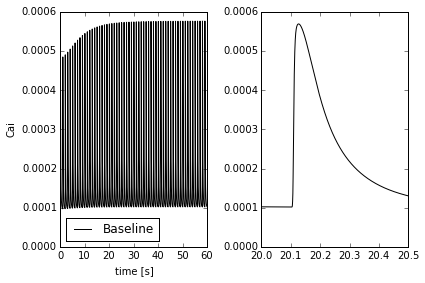

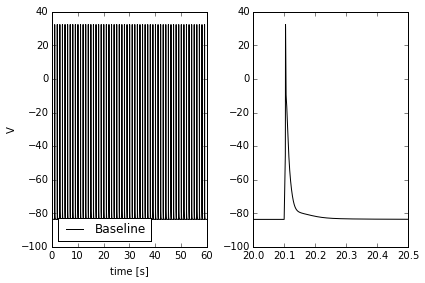

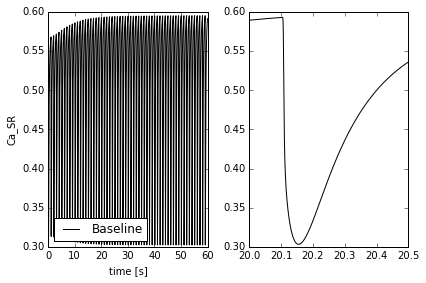

In [8]:
root="/net/share/shared/papers/despa/"
states = ["Cai","V","Ca_SR"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.5e3],
                          case1legend='Baseline')
        plt.tight_layout()
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/Baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)
        #plt.gcf().savefig(root+"baseline_vs_IncrPCa_"+"_%s"%state+".png")

In [19]:
p_idx = caseExtended1Hz.data['p_idx']
print p_idx.keys

AttributeError: 'list' object has no attribute 'keys'

In [98]:
nnprint p_idx

SyntaxError: invalid syntax (<ipython-input-98-a26710e9967e>, line 1)

In [106]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('G_CaBk')]
print p[p_idx.index('G_CaBk')]*1.25

0.0007539
0.000942375


In [105]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('G_NaBk')]
print p[p_idx.index('G_NaBk')]*1.25

0.001337
0.00167125


In [104]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('V_max_Jpump')]
print p[p_idx.index('V_max_Jpump')]*0.5

0.00702
0.00351


In [24]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('PCa')]
print p[p_idx.index('PCa')]*1.25

0.000891
0.00111375


In [25]:
1.875+0.125

2.0

In [26]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('V_max_INaCa')]
print p[p_idx.index('V_max_INaCa')]*1.25

1.0
1.25


In [103]:
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('I_NaK_max')]
print p[p_idx.index('I_NaK_max')]*1.40

5.0
7.0


## Increase Ca2+/Na+ Leak (Amylin)

In [9]:
caseAmylin1p25 = empty()
caseAmylin1p25.caseName = root+"mouse_leak1p25x_freq1p0_60" 
caseAmylin1p25.fileName = caseAmylin1p25.caseName+".pickle"
caseAmylin1p25.data = ao.readPickle(caseAmylin1p25.fileName) 

Reading /net/share/shared/papers/despa/mouse_leak1p25x_freq1p0_60.pickle


In [68]:
s = caseAmylin1p25.data['s']
s_idx = caseAmylin1p25.data['s_idx']
idx = s_idx.index("Ca_SR")

maxAmylin_CaSR = np.amax(s[200e3:205e3,idx])
print maxAmylin_CaSR
minAmylin_CaSR = np.amin(s[200e3:205e3,idx])
print minAmylin_CaSR
diffAmylin_CaSR=maxAmylin_CaSR-minAmylin_CaSR
print diffAmylin_CaSR

0.628225629516
0.289236417419
0.338989212096


In [69]:
s = caseAmylin1p25.data['s']
s_idx = caseAmylin1p25.data['s_idx']
idx = s_idx.index("Cai")

maxAmylin_Cai = np.amax(s[200e3:205e3,idx])
print maxAmylin_Cai
minAmylin_Cai = np.amin(s[200e3:205e3,idx])
print minAmylin_Cai
diffAmylin_Cai=maxAmylin_Cai-minAmylin_Cai
print diffAmylin_Cai

0.000706216626104
0.000109040099006
0.000597176527098


In [30]:
(diffBaseline_Cai-diffAmylin_Cai)/diffAmylin_Cai

-0.21693389134722263

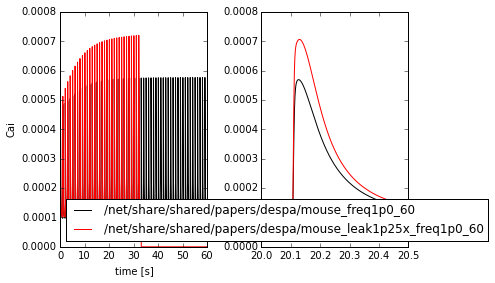

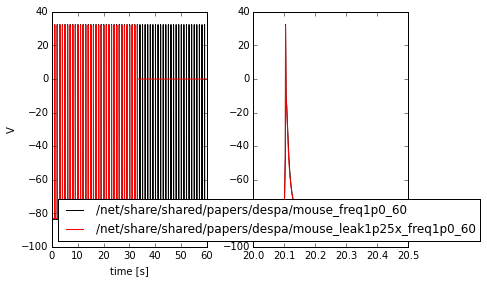

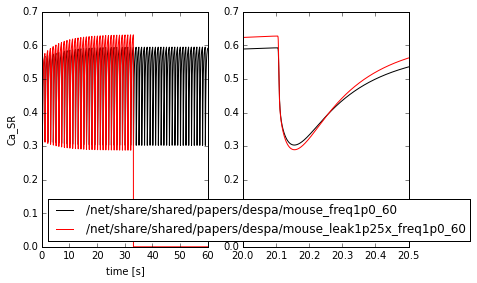

In [10]:
root="/net/share/shared/papers/despa/"
states = ["Cai","V","Ca_SR"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseAmylin1p25.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.5e3],
                          case1legend=caseExtended1Hz.caseName,
                          case2legend=caseAmylin1p25.caseName)
        plt.tight_layout()
        #plt.gcf().savefig(root+"baseline_vs_IncrPCa_"+"_%s"%state+".png") 

## Increase Ca2+ leak

In [32]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseCa1p125 = empty()
caseCa1p125.caseName = root+"mouse_CaLeak1p125x_freq1p0_60" 
caseCa1p125.fileName = caseCa1p125.caseName+".pickle"
caseCa1p125.data = ao.readPickle(caseCa1p125.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p125x_freq1p0_60.pickle


In [33]:
s = caseCa1p125.data['s']
s_idx = caseCa1p125.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p125_CaSR = np.amax(s[200e3:205e3,idx])
print max1p125_CaSR
min1p125_CaSR = np.amin(s[200e3:205e3,idx])
print min1p125_CaSR
diff1p125_CaSR=max1p125_CaSR-min1p125_CaSR
print diff1p125_CaSR

0.609577914724
0.296729571697
0.312848343027


In [12]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseCa1p25 = empty()
caseCa1p25.caseName = root+"mouse_CaLeak1p25x_freq1p0_60" 
caseCa1p25.fileName = caseCa1p25.caseName+".pickle"
caseCa1p25.data = ao.readPickle(caseCa1p25.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p25x_freq1p0_60.pickle


In [35]:
s = caseCa1p25.data['s']
s_idx = caseCa1p25.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p25_CaSR = np.amax(s[200e3:205e3,idx])
print max1p25_CaSR
min1p25_CaSR = np.amin(s[200e3:205e3,idx])
print min1p25_CaSR
diff1p25_CaSR=max1p25_CaSR-min1p25_CaSR
print diff1p25_CaSR

0.626199656519
0.290051687523
0.336147968996


In [36]:
caseCa1p375 = empty()
caseCa1p375.caseName = root+"mouse_CaLeak1p375x_freq1p0_60" 
caseCa1p375.fileName = caseCa1p375.caseName+".pickle"
caseCa1p375.data = ao.readPickle(caseCa1p375.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p375x_freq1p0_60.pickle


In [37]:
s = caseCa1p375.data['s']
s_idx = caseCa1p375.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p375_CaSR = np.amax(s[200e3:205e3,idx])
print max1p375_CaSR
min1p375_CaSR = np.amin(s[200e3:205e3,idx])
print min1p375_CaSR
diff1p375_CaSR=max1p375_CaSR-min1p375_CaSR
print diff1p375_CaSR

0.642819748014
0.2833835522
0.359436195814


In [38]:
caseCa1p5 = empty()
caseCa1p5.caseName = root+"mouse_CaLeak1p5x_freq1p0_60" 
caseCa1p5.fileName = caseCa1p5.caseName+".pickle"
caseCa1p5.data = ao.readPickle(caseCa1p5.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p5x_freq1p0_60.pickle


In [94]:
s = caseCa1p5.data['s']
s_idx = caseCa1p5.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p5_CaSR = np.amax(s[200e3:205e3,idx])
print max1p5_CaSR
min1p5_CaSR = np.amin(s[200e3:205e3,idx])
print min1p5_CaSR
diff1p5_CaSR=max1p5_CaSR-min1p5_CaSR
print diff1p5_CaSR

0.659249698234
0.276971730508
0.382277967726


In [95]:
caseCa1p625 = empty()
caseCa1p625.caseName = root+"mouse_CaLeak1p625x_freq1p0_60" 
caseCa1p625.fileName = caseCa1p625.caseName+".pickle"
caseCa1p625.data = ao.readPickle(caseCa1p625.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p625x_freq1p0_60.pickle


In [96]:
s = caseCa1p625.data['s']
s_idx = caseCa1p625.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p625_CaSR = np.amax(s[200e3:205e3,idx])
print max1p625_CaSR
min1p625_CaSR = np.amin(s[200e3:205e3,idx])
print min1p625_CaSR
diff1p625_CaSR=max1p625_CaSR-min1p625_CaSR
print diff1p625_CaSR

0.675201265538
0.271075934951
0.404125330587


In [97]:
caseCa1p75 = empty()
caseCa1p75.caseName = root+"mouse_CaLeak1p75x_freq1p0_60" 
caseCa1p75.fileName = caseCa1p75.caseName+".pickle"
caseCa1p75.data = ao.readPickle(caseCa1p75.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p75x_freq1p0_60.pickle


In [107]:
s = caseCa1p75.data['s']
s_idx = caseCa1p75.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p75_CaSR = np.amax(s[200e3:205e3,idx])
print max1p75_CaSR
min1p75_CaSR = np.amin(s[200e3:205e3,idx])
print min1p75_CaSR
diff1p75_CaSR=max1p75_CaSR-min1p75_CaSR
print diff1p75_CaSR

0.690255321708
0.265983606034
0.424271715673


In [108]:
caseCa1p875 = empty()
caseCa1p875.caseName = root+"mouse_CaLeak1p875x_freq1p0_60" 
caseCa1p875.fileName = caseCa1p875.caseName+".pickle"
caseCa1p875.data = ao.readPickle(caseCa1p875.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p875x_freq1p0_60.pickle


In [109]:
s = caseCa1p875.data['s']
s_idx = caseCa1p875.data['s_idx']
idx = s_idx.index("Ca_SR")

max1p875_CaSR = np.amax(s[200e3:205e3,idx])
print max1p875_CaSR
min1p875_CaSR = np.amin(s[200e3:205e3,idx])
print min1p875_CaSR
diff1p875_CaSR=max1p875_CaSR-min1p875_CaSR
print diff1p875_CaSR

0.703785929391
0.262064917772
0.441721011619


## Decrease SERCA uptake

In [63]:
caseSERCA0p5 = empty()
caseSERCA0p5.caseName = "mouse_decrSERCAuptake0p50_freq1p0_60" 
caseSERCA0p5.fileName = caseSERCA0p5.caseName+".pickle"
caseSERCA0p5.data = ao.readPickle(caseSERCA0p5.fileName) 

Reading mouse_decrSERCAuptake0p50_freq1p0_60.pickle


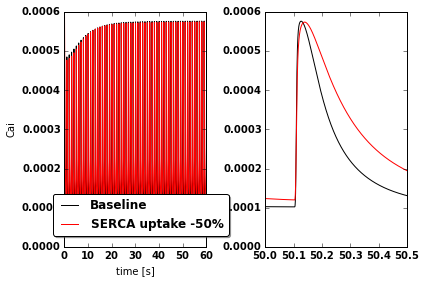

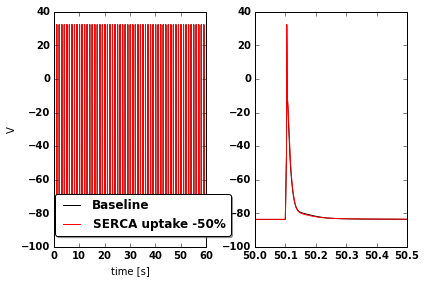

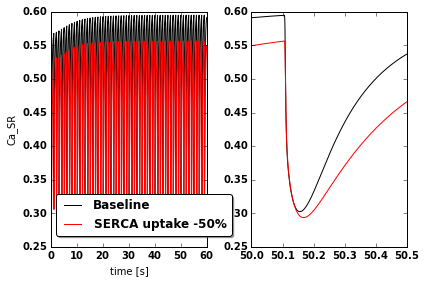

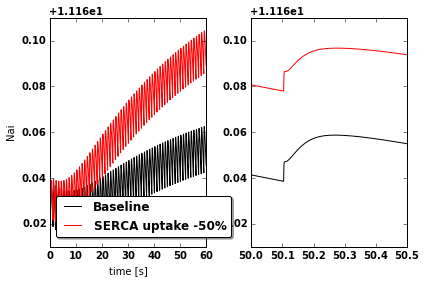

In [111]:
root="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/"
states = ["Cai","V","Ca_SR","Nai"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseSERCA0p5.data,idxName=state, 
                          ylabel=state,trange=[50e3,50.5e3],
                          case1legend="Baseline",
                          case2legend="SERCA uptake -50%")
        plt.legend(bbox_to_anchor=(1.20,0.25),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile=root+"baseline_vs_SERCA50_"+"%s"%state+".png"
        plt.gcf().savefig(outFile)
        

In [112]:
s = caseSERCA0p5.data['s']
s_idx = caseSERCA0p5.data['s_idx']
idx = s_idx.index("Cai")

maxUCD_Cai = np.amax(s[200e3:205e3,idx])
print maxUCD_Cai
minUCD_Cai = np.amin(s[200e3:205e3,idx])
print minUCD_Cai
diffUCD_Cai=maxUCD_Cai-minUCD_Cai
print diffUCD_Cai

print (diffUCD_Cai-diffBaseline_Cai)/diffBaseline_Cai

0.000567553270569
0.000119250558485
0.000448302712084
-0.0413276327994


In [113]:
s = caseSERCA0p5.data['s']
s_idx = caseSERCA0p5.data['s_idx']
idx = s_idx.index("Ca_SR")

maxUCD_CaSR = np.amax(s[200e3:205e3,idx])
print maxUCD_CaSR
minUCD_CaSR = np.amin(s[200e3:205e3,idx])
print minUCD_CaSR
diffUCD_CaSR=maxUCD_CaSR-minUCD_CaSR
print diffUCD_CaSR

print (diffUCD_CaSR-diffBaseline_CaSR)/diffBaseline_CaSR

0.554993093432
0.294208323122
0.26078477031
-0.100366689232


## HIP case

In [114]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseHIP = empty()
caseHIP.caseName = root+"mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60" 
caseHIP.fileName = caseHIP.caseName+".pickle"
caseHIP.data = ao.readPickle(caseHIP.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60.pickle


In [115]:
s = caseHIP.data['s']
s_idx = caseHIP.data['s_idx']
idx = s_idx.index("Ca_SR")

maxHIP_CaSR = np.amax(s[200e3:205e3,idx])
print maxHIP_CaSR
minHIP_CaSR = np.amin(s[200e3:205e3,idx])
print minHIP_CaSR
diffHIP_CaSR=maxHIP_CaSR-minHIP_CaSR
print diffHIP_CaSR

0.582590846849
0.281859717331
0.300731129518


In [116]:
s = caseHIP.data['s']
s_idx = caseHIP.data['s_idx']
idx = s_idx.index("Cai")

maxHIP_Cai = np.amax(s[200e3:205e3,idx])
print maxHIP_Cai
minHIP_Cai = np.amin(s[200e3:205e3,idx])
print minHIP_Cai
diffHIP_Cai=maxHIP_Cai-minHIP_Cai
print diffHIP_Cai

(diffBaseline_Cai-diffHIP_Cai)/diffBaseline_Cai

0.000689803875062
0.000127753374135
0.000562050500927


-0.20191618227023528

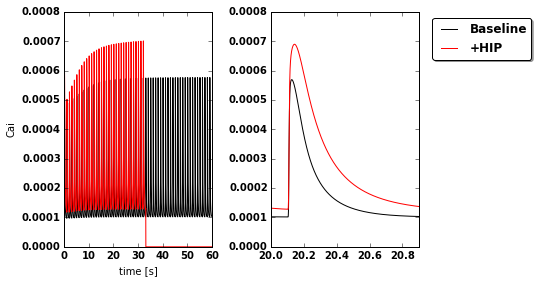

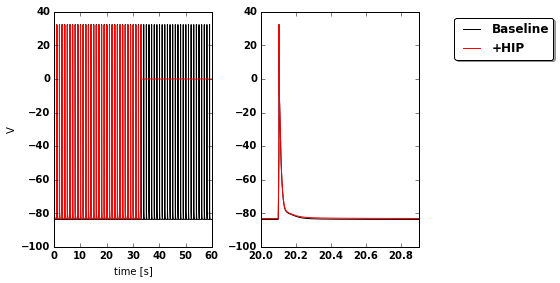

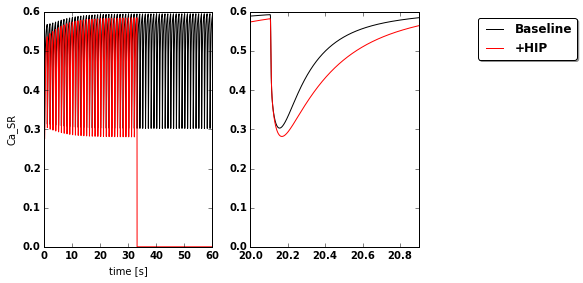

In [117]:
root="/net/share/shared/papers/despa/"
states = ["Cai","V","Ca_SR"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseHIP.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.9e3],
                          case1legend="Baseline",
                          case2legend="+HIP")
        plt.legend(bbox_to_anchor=(3.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/HIP_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300) 

        
     #   print caseExtended1Hz.data

## Increase LCC

In [118]:
caseLCC = empty()
caseLCC.caseName = "mouse_lcc1p25x_freq1p0_60" 
caseLCC.fileName = caseLCC.caseName+".pickle"
caseLCC.data = ao.readPickle(caseLCC.fileName) 

Reading mouse_lcc1p25x_freq1p0_60.pickle


In [119]:
s = caseLCC.data['s']
s_idx = caseLCC.data['s_idx']
idx = s_idx.index("Ca_SR")

maxLCC_CaSR = np.amax(s[200e3:205e3,idx])
print maxLCC_CaSR
minLCC_CaSR = np.amin(s[200e3:205e3,idx])
print minLCC_CaSR
diffLCC_CaSR=maxLCC_CaSR-minLCC_CaSR
print diffLCC_CaSR

0.616870650421
0.289670832975
0.327199817447


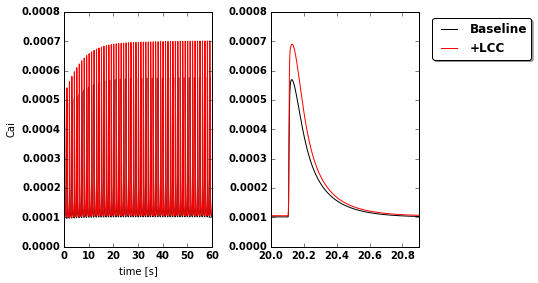

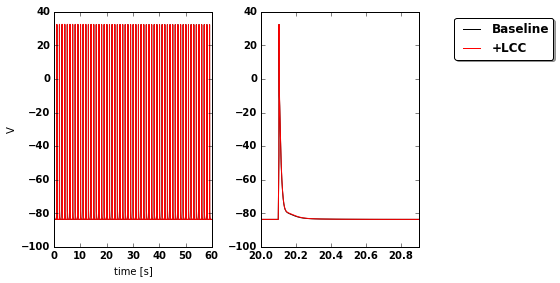

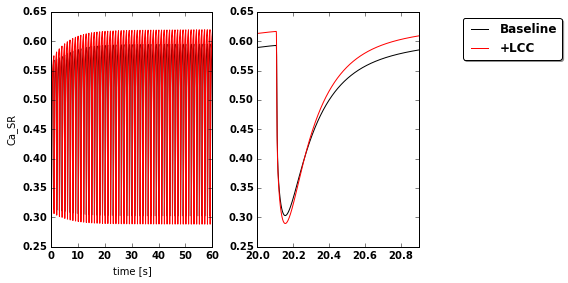

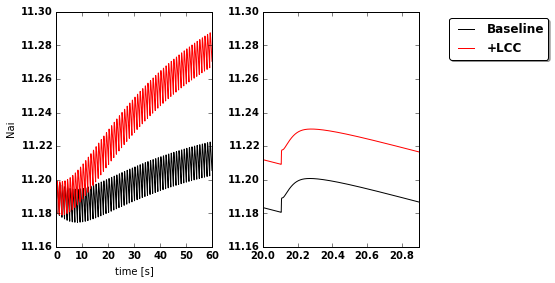

In [120]:
root="/net/share/shared/papers/despa/"
states = ["Cai","V","Ca_SR","Nai"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseLCC.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.9e3],
                          case1legend="Baseline",
                          case2legend="+LCC")
        plt.legend(bbox_to_anchor=(3.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        #plt.gcf().savefig(root+"baseline_vs_IncrPCa_"+"_%s"%state+".png")
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/LCC_%s.png"%i
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)        
     #   print caseExtended1Hz.data

## Increase NCX

In [121]:
caseNCX = empty()
caseNCX.caseName = "mouse_ncx1p25x_freq1p0_60" 
caseNCX.fileName = caseNCX.caseName+".pickle"
caseNCX.data = ao.readPickle(caseNCX.fileName) 

Reading mouse_ncx1p25x_freq1p0_60.pickle


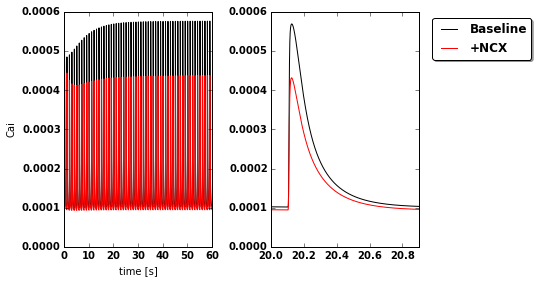

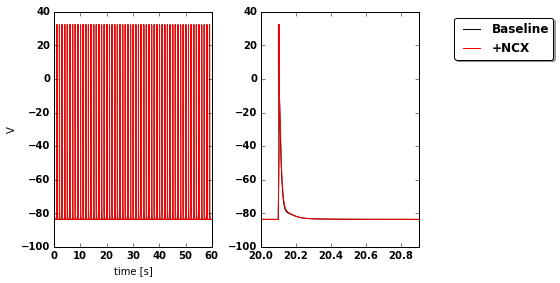

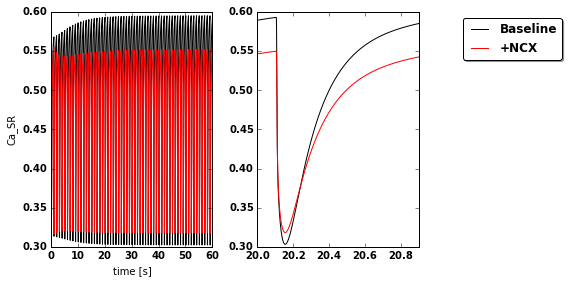

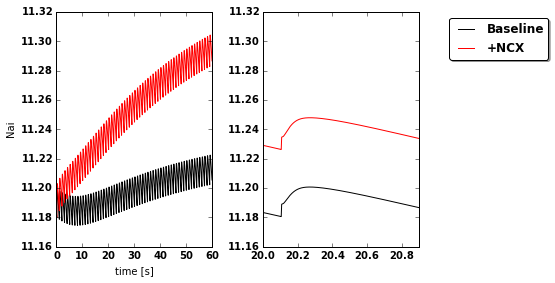

In [122]:
root="/net/share/shared/papers/despa/"
states = ["Cai","V","Ca_SR","Nai"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseNCX.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.9e3],
                          case1legend="Baseline",
                          case2legend="+NCX")
        plt.legend(bbox_to_anchor=(3.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/NCX_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300) 


## Plot diff_CaSR

In [123]:
names=['Baseline','+Amylin','+HIP','UCD']

diff_CaSR=np.array([diffBaseline_CaSR, diffAmylin_CaSR, diffHIP_CaSR, diffUCD_CaSR])
print diff_CaSR

min_CaSR=np.array([minBaseline_CaSR, minAmylin_CaSR, minHIP_CaSR, minUCD_CaSR])
print min_CaSR

print (diffAmylin_CaSR-diffBaseline_CaSR)/diffBaseline_CaSR
print (diffUCD_CaSR-diffBaseline_CaSR)/diffBaseline_CaSR
print (diffHIP_CaSR-diffBaseline_CaSR)/diffBaseline_CaSR

print (minAmylin_CaSR-minBaseline_CaSR)/minBaseline_CaSR
print (minUCD_CaSR-minBaseline_CaSR)/minBaseline_CaSR
print (minHIP_CaSR-minBaseline_CaSR)/minBaseline_CaSR

[ 0.28987896  0.33898921  0.30073113  0.26078477]
[ 0.3031853   0.28923642  0.28185972  0.29420832]
0.1694163997
-0.100366689232
0.037436892412
-0.0460077844437
-0.0296088835753
-0.0703384497283


In [124]:
N = 1.

ind = np.arange(N)  # the x locations for the groups
width = 0.15  
width = 0.3

class empty:pass
baseline=empty()
baseline.names = names[::4]
baseline.diff = diff_CaSR[::4]
baseline.minima = min_CaSR[::4]

amylin=empty()
amylin.names = names[1::4]
amylin.diff = diff_CaSR[1::4]
amylin.minima = min_CaSR[1::4]

hip=empty()
hip.names = names[2::4]
hip.diff = diff_CaSR[2::4]
hip.minima = min_CaSR[2::4]

ucd=empty()
ucd.names = names[3::4]
ucd.diff = diff_CaSR[3::4]
ucd.minima = min_CaSR[3::4]

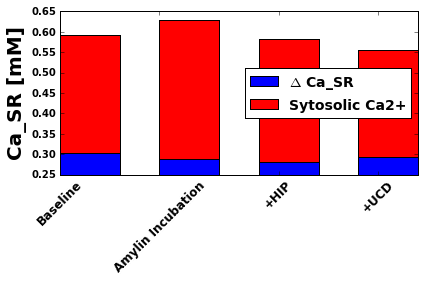

In [125]:
#fig, ax = plt.subplots(dpi=300,figsize=(15,6))
fig, ax = plt.subplots(dpi=600)
rects1a = ax.bar(ind, baseline.minima, width, color='b')
rects1b = ax.bar(ind, baseline.diff, width, color='r',bottom=baseline.minima)
rects2a = ax.bar(ind+width+0.2, amylin.minima, width, color='b')
rects2b = ax.bar(ind+width+0.2, amylin.diff, width, color='r',bottom=amylin.minima)
rects3a = ax.bar(ind+2*width+0.4, hip.minima, width, color='b')
rects3b = ax.bar(ind+2*width+0.4, hip.diff, width, color='r',bottom=hip.minima)
rects4a = ax.bar(ind+3*width+0.6, ucd.minima, width, color='b')
rects4b = ax.bar(ind+3*width+0.6, ucd.diff, width, color='r',bottom=ucd.minima)
#plt.plot((0.95, 0.95), (0, -620), 'k--')
         
ax.set_ylabel('Ca_SR [mM]',fontsize=20,weight="bold")
ax.legend( (rects1a[0],rects1b[0]),('$\Delta$ Ca_SR','Sytosolic Ca2+'),loc=5, fontsize=14) 

ax.set_xticks([ind,ind+width+0.2,ind+2*width+0.5,ind+3*width+0.7])
#ax.set_xticklabels( ('Baseline', 'SL Leak', '-SERCA/+Leak', '+LCC'), rotation=45,weight="bold" ,fontsize=12)
ax.set_xticklabels( ('Baseline', 'Amylin Incubation', '+HIP', '+UCD'), rotation=45,weight="bold" ,fontsize=12)
ax.set_ylim([0.25,0.65])
plt.tight_layout()
outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/CaSR_state.png"
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)
#plt.gcf().savefig("/net/share/cesc235/pkh-lab-papers/150817_despa/figs/CaSR_MinMax.png")

In [126]:
max_y=np.array([maxBaseline_CaSR, max1p125_CaSR, max1p25_CaSR, max1p375_CaSR, max1p5_CaSR, max1p625_CaSR, max1p75_CaSR])
min_y=np.array([minBaseline_CaSR, min1p125_CaSR, min1p25_CaSR, min1p375_CaSR, min1p5_CaSR, min1p625_CaSR, min1p75_CaSR])
diff_y=np.array([diffBaseline_CaSR, diff1p125_CaSR, diff1p25_CaSR, diff1p375_CaSR, diff1p5_CaSR, diff1p625_CaSR, diff1p75_CaSR])
leak=np.linspace(1.0, 1.75, 7)
print leak

[ 1.     1.125  1.25   1.375  1.5    1.625  1.75 ]


In [127]:
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)


In [128]:
print diff_y[2], diffAmylin_CaSR, diffUCD_CaSR

0.336147968996 0.338989212096 0.26078477031


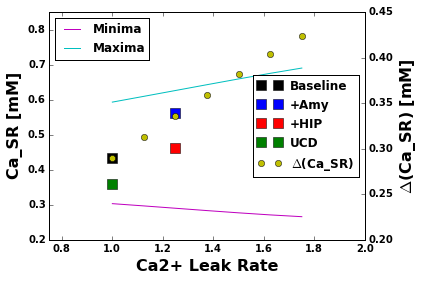

In [129]:
ax1 = plt.subplot(1,1,1)
ax1.plot(leak,min_y,'m',label='Minima')
ax1.plot(leak,max_y,'c',label='Maxima')
#ax1.legend(bbox_to_anchor=(1.75,1.0),fancybox=True, shadow=True)
ax1.legend(loc=2)

ax2 = ax1.twinx()


ax2.plot(leak[0],diff_y[0],'ks',ms=10,label='Baseline')
#ax2.legend(loc=3)

ax2.plot(leak[2],diffAmylin_CaSR,'bs',ms=10,label='+Amy')
#ax2.legend(loc=3)

ax2.plot(leak[2],diffHIP_CaSR,'rs',ms=10,label='+HIP')
#ax2.legend(loc=3)

ax2.plot(leak[0],diffUCD_CaSR,'gs',ms=10,label='UCD')
#ax2.legend(loc=3)

ax2.plot(leak,diff_y,'yo',label='$\Delta$(Ca_SR)')
ax2.legend(loc=5)
#ax2.legend(bbox_to_anchor=(1.9,0.75),fancybox=True, shadow=True)

ax1.set_xlim([0.75,2.0])
ax1.set_ylim([0.2,0.85])
ax2.set_ylim([0.2,0.45])
ax1.set_ylabel("Ca_SR [mM]",fontsize=16,weight="bold")
ax1.set_xlabel("Ca2+ Leak Rate",fontsize=16,weight="bold")
#ax1.set_title("Ca_SR")
ax2.set_ylabel("$\Delta$(Ca_SR) [mM]",fontsize=16,weight="bold")

outFile='/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/diff_CaSRConc.png'
plt.tight_layout()
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## Plot 4 Data

In [45]:
def Plot4PickleData(data1,data2=None,data3=None,data4=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, case4legend=None,
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  mM_to_uM = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s'] / mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)
  if data4!=None:
    datac4 = mycont(data4)


  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'b',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'r',label=case3legend)
    if data4!=None and datac4.v !=None:
      idx4 = datac4.v_idx.index(idxName)
    plt.plot(datac4.t,datac4.v[:,idx4],'g',label=case4legend)
    plt.xlim(trange*ms_to_s)
#    plt.ylim(250,650)
    pyplot.locator_params(nbins=5)
    plt.legend(loc=0)
    plt.ylim(0.10,0.75)
#    plt.ylim(10.5,11.5)
#    plt.ylim(0.0,0.16)
#    plt.subplot(1,2,1)

#  if datac1.v !=None:
#    idx1 = datac1.v_idx.index(idxName)
#    plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
#  if data2!=None and datac2.v !=None:
#    idx2 = datac2.v_idx.index(idxName)
#    plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
#  if data3!=None and datac3.v !=None:
#    idx3 = datac3.v_idx.index(idxName)
#    plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
  plt.xlabel('time [s]', weight="bold",fontsize=14)
  plt.ylabel(ylabel+" [uM]", weight="bold",fontsize=14)
#  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14)
#  plt.legend(loc=3)
  plt.tight_layout()

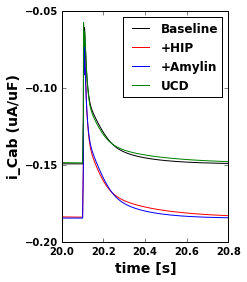

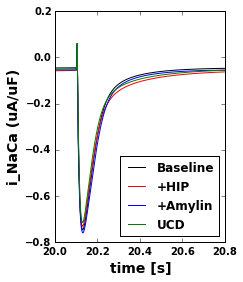

In [150]:

root="/net/share/shared/papers/despa/"
states = ["i_Cab","i_NaCa"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseHIP.data,data3=caseAmylin1p25.data,data4=caseSERCA0p5.data,\
                        idxName=state, 
                          ylabel=state,trange=[20.0e3,20.8e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin",
                          case4legend="UCD")
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/comp_%s.png"%state
   #     plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

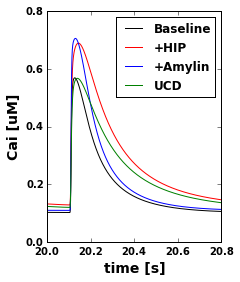

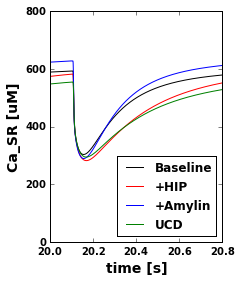

In [152]:

root="/net/share/shared/papers/despa/"
states = ["Cai","Ca_SR"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseHIP.data,data3=caseAmylin1p25.data,data4=caseSERCA0p5.data,
                          idxName=state, 
                          ylabel=state,trange=[20.0e3,20.8e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin",
                          case4legend="UCD")
       # plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/compare_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

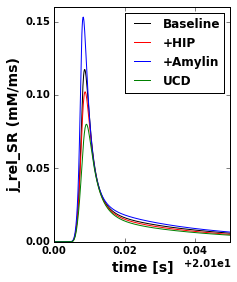

In [144]:
root="/net/share/shared/papers/despa/"
states = ["j_rel_SR"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseHIP.data,data3=caseAmylin1p25.data,data4=caseSERCA0p5.data,\
                        idxName=state, 
                          ylabel=state,trange=[20.10e3,20.15e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin",
                          case4legend="UCD")
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/comp_%s.png"%state
      #  plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

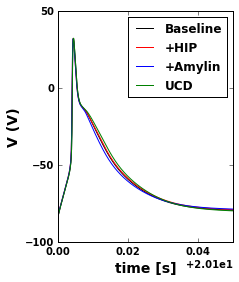

In [148]:
root="/net/share/shared/papers/despa/"
states = ["V"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseHIP.data,data3=caseAmylin1p25.data,data4=caseSERCA0p5.data,\
                        idxName=state, 
                          ylabel=state,trange=[20.10e3,20.15e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin",
                          case4legend="UCD")
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/comp_%s.png"%state
  #      plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## Computational

In [135]:
case0p5Hz = empty()
case0p5Hz.caseName = "mouse_freq0p5_60" 
case0p5Hz.fileName = case0p5Hz.caseName+".pickle"
case0p5Hz.data = ao.readPickle(case0p5Hz.fileName) 

Reading mouse_freq0p5_60.pickle


In [136]:
s = case0p5Hz.data['s']
s_idx = case0p5Hz.data['s_idx']
idx = s_idx.index("Cai")

max0p5_Cai = np.amax(s[200e3:205e3,idx])
print max0p5_Cai
min0p5_Cai = np.amin(s[200e3:205e3,idx])
print min0p5_Cai
diff0p5_Cai=max0p5_Cai-min0p5_Cai
print diff0p5_Cai

0.000704839384679
0.000105571515722
0.000599267868957


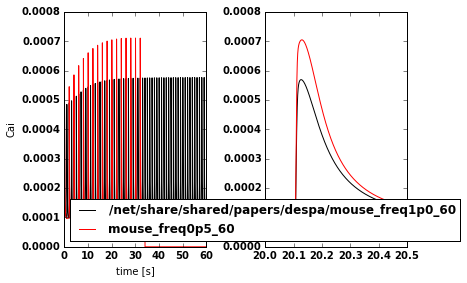

In [137]:
root="/net/share/shared/papers/despa/"
states = ["Cai"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=case0p5Hz.data,idxName=state, 
                          ylabel=state,trange=[20e3,20.5e3],
                          case1legend=caseExtended1Hz.caseName,
                          case2legend=case0p5Hz.caseName)
                
        plt.tight_layout()    
 #       outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/Baseline0p5__%s.png"%state
 #       plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [138]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseHIP_0p5Hz = empty()
caseHIP_0p5Hz.caseName = root+"mouse_decrSERCAuptake0p50_leak1p25x_freq0p5_60" 
caseHIP_0p5Hz.fileName = caseHIP_0p5Hz.caseName+".pickle"
caseHIP_0p5Hz.data = ao.readPickle(caseHIP_0p5Hz.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq0p5_60.pickle


In [139]:
s = caseHIP_0p5Hz.data['s']
s_idx = caseHIP_0p5Hz.data['s_idx']
idx = s_idx.index("Cai")

maxHIP_0p5Hz_Cai = np.amax(s[200e3:205e3,idx])
print maxHIP_0p5Hz_Cai
minHIP_0p5Hz_Cai = np.amin(s[200e3:205e3,idx])
print minHIP_0p5Hz_Cai
diffHIP_0p5Hz_Cai=maxHIP_0p5Hz_Cai-minHIP_0p5Hz_Cai
print diffHIP_0p5Hz_Cai

0.000898849951963
0.000123934027346
0.000774915924617


In [140]:
case2p0Hz = empty()
case2p0Hz.caseName = "mouse_freq2p0_60" 
case2p0Hz.fileName = case2p0Hz.caseName+".pickle"
case2p0Hz.data = ao.readPickle(case2p0Hz.fileName) 

Reading mouse_freq2p0_60.pickle


In [141]:
s = case2p0Hz.data['s']
s_idx = case2p0Hz.data['s_idx']
idx = s_idx.index("Cai")

max2p0Hz_Cai = np.amax(s[200e3:205e3,idx])
print max2p0Hz_Cai
min2p0Hz_Cai = np.amin(s[200e3:205e3,idx])
print min2p0Hz_Cai
diff2p0Hz_Cai=max2p0Hz_Cai-min2p0Hz_Cai
print diff2p0Hz_Cai

0.000553063162565
0.000119008065332
0.000434055097233


In [142]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseHIP_2p0Hz = empty()
caseHIP_2p0Hz.caseName = root+"mouse_decrSERCAuptake0p50_leak1p25x_freq2p0_60" 
caseHIP_2p0Hz.fileName = caseHIP_2p0Hz.caseName+".pickle"
caseHIP_2p0Hz.data = ao.readPickle(caseHIP_2p0Hz.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq2p0_60.pickle


KeyboardInterrupt: 

In [ ]:
s = caseHIP_2p0Hz.data['s']
s_idx = caseHIP_2p0Hz.data['s_idx']
idx = s_idx.index("Cai")

maxHIP_2p0Hz_Cai = np.amax(s[200e3:205e3,idx])
print maxHIP_2p0Hz_Cai
minHIP_2p0Hz_Cai = np.amin(s[200e3:205e3,idx])
print minHIP_2p0Hz_Cai
diffHIP_2p0Hz_Cai=maxHIP_2p0Hz_Cai-minHIP_2p0Hz_Cai
print diffHIP_2p0Hz_Cai

## Experimental

## Control

In [14]:
data = np.loadtxt("exp.txt",skiprows=1)

## 0.5 Hz

0.060976
(38,)


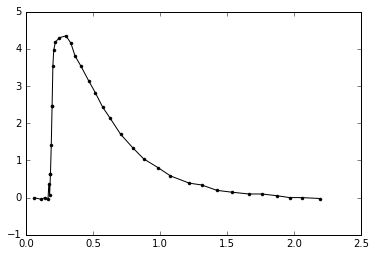

In [16]:
plt.plot(data[:,0],data[:,1],'k.-')
t_ctl_0p5Hz=data[:,0]
ctl_0p5Hz=data[:,1]
print t_ctl_0p5Hz[0]

print np.shape(ctl_0p5Hz)

In [17]:
minCtl_Cai_exp = np.amin(ctl_0p5Hz)
print minCtl_Cai_exp


-0.048583


4.396763


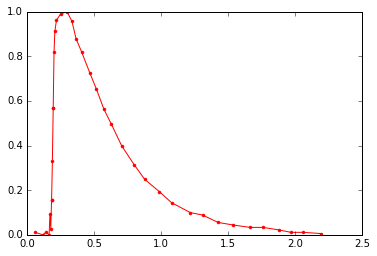

In [18]:
###Experimental

Ctl_Cai_shift =  ctl_0p5Hz -  minCtl_Cai_exp
maxCtl_Cai_exp = np.amax(Ctl_Cai_shift)
print maxCtl_Cai_exp
Ctl_Cai_shift/=maxCtl_Cai_exp
plt.plot(t_ctl_0p5Hz,Ctl_Cai_shift,'r.-')
#plt.plot(caseExtended1Hz.t,caseExtended1Hz.v[:,idx1],'k')

#HIP_Cai_shift =  hip_0p5Hz - minHIP_Cai 
#HIP_Cai_shift/=maxHIP_Cai_exp
#plt.plot(HIP_Cai_shift,'r.-')

In [19]:
###Simulation
s = case0p5Hz.data['s']
s_idx = case0p5Hz.data['s_idx']
idx = s_idx.index("Cai")
t = case0p5Hz.data['t']

min0p5Hz_Cai = np.amin(s[200e3:210e3,idx])
print min0p5Hz_Cai

Comp_Cai_shift = s[200e3:210e3,idx] - min0p5Hz_Cai
print Comp_Cai_shift
maxComp_Cai_shift = np.amax(Comp_Cai_shift)
Comp_Cai_shift/=maxComp_Cai_shift
print Comp_Cai_shift

ms_to_s = 1e-3
time=t[200e3:210e3]*ms_to_s
plt.plot(time,Comp_Cai_shift,'r.-')


NameError: name 'case0p5Hz' is not defined

In [ ]:
t_exp = t_ctl_0p5Hz+19.91-t_ctl_0p5Hz[0]

plt.plot(t_exp,Ctl_Cai_shift,'r.-',label = "Experiment, Despa 2012")
plt.plot(time,Comp_Cai_shift,'k.-', label = "Computational")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Normalized Cai')
plt.tight_layout()
outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/Baseline0p5Hz_normalized.png"
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## HIP

In [ ]:
plt.plot(data[:,2],data[:,3],'r.-')
t_hip_0p5Hz=data[:,2]
hip_0p5Hz=data[:,3]
print t_hip_0p5Hz[0]

In [ ]:
minHIP_Cai_exp = np.amin(hip_0p5Hz)
print minHIP_Cai_exp


In [ ]:
maxHIP_Cai_exp = np.amax(hip_0p5Hz)
print maxHIP_Cai_exp
minHIP_Cai_exp = np.amin(hip_0p5Hz)
print minHIP_Cai_exp
diffHIP_Cai_exp=maxHIP_Cai_exp-minHIP_Cai_exp
print diffHIP_Cai_exp

In [ ]:
HIP_Cai_shift =  hip_0p5Hz -  minHIP_Cai_exp
maxHIP_Cai_exp = np.amax(HIP_Cai_shift)
print maxHIP_Cai_exp
HIP_Cai_shift/=maxHIP_Cai_exp
plt.plot(t_hip_0p5Hz,HIP_Cai_shift,'r.-')

In [ ]:
###Simulation
s = caseHIP_0p5Hz.data['s']
s_idx = caseHIP_0p5Hz.data['s_idx']
idx = s_idx.index("Cai")
t = caseHIP_0p5Hz.data['t']

minHIP0p5Hz_Cai = np.amin(s[200e3:210e3,idx])
print minHIP0p5Hz_Cai

CompHIP_Cai_shift = s[200e3:210e3,idx] - minHIP0p5Hz_Cai
print CompHIP_Cai_shift
maxCompHIP_Cai_shift = np.amax(CompHIP_Cai_shift)
CompHIP_Cai_shift/=maxCompHIP_Cai_shift
print CompHIP_Cai_shift

time=t[200e3:210e3]*ms_to_s
plt.plot(time,CompHIP_Cai_shift,'r.-')

In [ ]:
t_HIPexp = t_hip_0p5Hz+19.9+t_hip_0p5Hz[0]

plt.plot(t_HIPexp,HIP_Cai_shift,'r.-',label = "Experiment, Despa 2012")
plt.plot(time,CompHIP_Cai_shift,'k.-', label = "Computational")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Normalized Cai')
plt.tight_layout()
outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/HIP0p5Hz_normalized.png"
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## 2.0 Hz

## Baseline

In [ ]:
plt.plot(data[:,4],data[:,5],'b.-')
plt.plot(data[:,6],data[:,7],'r.-')

In [ ]:
minCtl2p0Hz_Cai_exp = np.amin(ctl_2p0Hz)
print minCtl2p0Hz_Cai_exp

plt.plot(data[:,4],data[:,5],'k.-')
t_ctl_2p0Hz=data[:,4]
ctl_2p0Hz=data[:,5]
print t_ctl_2p0Hz[0]

In [ ]:
###Experimental

Ctl2p0Hz_Cai_shift =  ctl_2p0Hz - minCtl2p0Hz_Cai_exp
maxCtl2p0Hz_Cai_exp = np.amax(Ctl2p0Hz_Cai_shift)
print maxCtl2p0Hz_Cai_exp
Ctl2p0Hz_Cai_shift/=maxCtl2p0Hz_Cai_exp
plt.plot(t_ctl_2p0Hz,Ctl2p0Hz_Cai_shift,'r.-')

In [ ]:
###Simulation
s = case2p0Hz.data['s']
s_idx = case2p0Hz.data['s_idx']
idx = s_idx.index("Cai")
t = case2p0Hz.data['t']

min2p0Hz_Cai = np.amin(s[200e3:205e3,idx])
print min2p0Hz_Cai

Comp2p0Hz_Cai_shift = s[200e3:205e3,idx] - min2p0Hz_Cai
print Comp2p0Hz_Cai_shift
maxComp2p0Hz_Cai_shift = np.amax(Comp2p0Hz_Cai_shift)
Comp2p0Hz_Cai_shift/=maxComp2p0Hz_Cai_shift
print Comp2p0Hz_Cai_shift

time=t[200e3:205e3]*ms_to_s
plt.plot(time,Comp2p0Hz_Cai_shift,'r.-')


In [ ]:
t_exp = t_ctl_2p0Hz+20.03+t_ctl_2p0Hz[0]

plt.plot(t_exp,Ctl2p0Hz_Cai_shift,'r.-',label = "Experiment, Despa 2012")
plt.plot(time,Comp2p0Hz_Cai_shift,'k.-', label = "Computational")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Normalized Cai')
plt.tight_layout()
outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/Baseline2p0Hz_normalized.png"
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## HIP

In [ ]:
plt.plot(data[:,6],data[:,7],'r.-')
t_hip_2p0Hz=data[:,6]
hip_2p0Hz=data[:,7]
print t_hip_2p0Hz[0]

In [ ]:
minHIP2p0Hz_Cai_exp = np.amin(hip_2p0Hz)
print minHIP2p0Hz_Cai_exp


In [ ]:
maxHIP2p0Hz_Cai_exp = np.amax(hip_2p0Hz)
ind_maxHIP2p0Hz_Cai_exp=np.argmax(hip_2p0Hz)
print ind_maxHIP2p0Hz_Cai_exp, maxHIP2p0Hz_Cai_exp
t_maxHIP2p0Hz_Cai_exp = t_hip_2p0Hz[ind_maxHIP2p0Hz_Cai_exp]
print t_maxHIP2p0Hz_Cai_exp
minHIP2p0Hz_Cai_exp = np.amin(hip_2p0Hz)
print minHIP2p0Hz_Cai_exp
diffHIP2p0Hz_Cai_exp=maxHIP2p0Hz_Cai_exp-minHIP2p0Hz_Cai_exp
print diffHIP2p0Hz_Cai_exp

In [ ]:
HIP2p0Hz_Cai_shift =  hip_2p0Hz -  minHIP2p0Hz_Cai_exp
maxHIP2p0Hz_Cai_exp = np.amax(HIP2p0Hz_Cai_shift)
print maxHIP2p0Hz_Cai_exp
HIP2p0Hz_Cai_shift/=maxHIP2p0Hz_Cai_exp
plt.plot(t_hip_2p0Hz,HIP2p0Hz_Cai_shift,'r.-')

In [ ]:
###Simulation
s = caseHIP_2p0Hz.data['s']
s_idx = caseHIP_2p0Hz.data['s_idx']
idx = s_idx.index("Cai")
t = caseHIP_2p0Hz.data['t']

minHIP2p0Hz_Cai = np.amin(s[200e3:205e3,idx])
print minHIP2p0Hz_Cai

CompHIP2p0Hz_Cai_shift = s[200e3:205e3,idx] - minHIP2p0Hz_Cai
print CompHIP2p0Hz_Cai_shift
maxCompHIP2p0Hz_Cai_shift = np.amax(CompHIP2p0Hz_Cai_shift)
CompHIP2p0Hz_Cai_shift/=maxCompHIP2p0Hz_Cai_shift
print CompHIP2p0Hz_Cai_shift

time=t[200e3:205e3]*ms_to_s
plt.plot(time,CompHIP2p0Hz_Cai_shift,'r.-')

In [ ]:
t_HIP2p0Hzexp = t_hip_2p0Hz+20.05+t_hip_2p0Hz[0]

plt.plot(t_HIP2p0Hzexp,HIP2p0Hz_Cai_shift,'r.-',label = "Experiment, Despa 2012")
plt.plot(time,CompHIP2p0Hz_Cai_shift,'k.-', label = "Computational")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Normalized Cai')
plt.tight_layout()
outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/HIP2p0Hz_normalized.png"
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## Na leak

In [13]:
caseNaLeak = empty()
caseNaLeak.caseName = "mouse_NaLeak1p25x_freq1p0_60" 
caseNaLeak.fileName = caseNaLeak.caseName+".pickle"
caseNaLeak.data = ao.readPickle(caseNaLeak.fileName) 
#cases[case.caseName] = case

Reading mouse_NaLeak1p25x_freq1p0_60.pickle


In [14]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseCaLeak = empty()
caseCaLeak.caseName = root+"mouse_CaLeak1p25x_freq1p0_60" 
caseCaLeak.fileName = caseCaLeak.caseName+".pickle"
caseCaLeak.data = ao.readPickle(caseCaLeak.fileName) 
#cases[case.caseName] = case

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaLeak1p25x_freq1p0_60.pickle


In [ ]:
def Plot3PickleData(data1,data2=None,data3=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, case4legend=None,
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s']
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)

  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)

    plt.xlim(trange*ms_to_s)

#    plt.subplot(1,2,1)

#  if datac1.v !=None:
#    idx1 = datac1.v_idx.index(idxName)
#    plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
#  if data2!=None and datac2.v !=None:
#    idx2 = datac2.v_idx.index(idxName)
#    plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
#  if data3!=None and datac3.v !=None:
#    idx3 = datac3.v_idx.index(idxName)
#    plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)

  plt.xlabel('time [s]')
  plt.ylabel(ylabel)
  plt.legend(loc=3)
  plt.tight_layout()

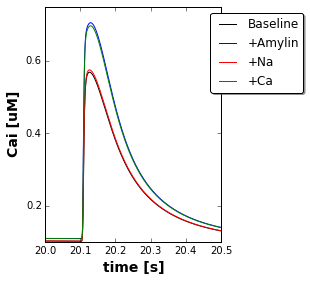

In [46]:

root="/net/share/shared/papers/despa/"
states = ["Cai"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseAmylin1p25.data,data3=caseNaLeak.data,data4=caseCaLeak.data,
                          idxName=state, 
                          ylabel=state,trange=[20.0e3,20.5e3],
                          case1legend="Baseline",
                          case2legend="+Amylin",
                          case3legend="+Na",
                          case4legend="+Ca")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/CaNa_leak_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

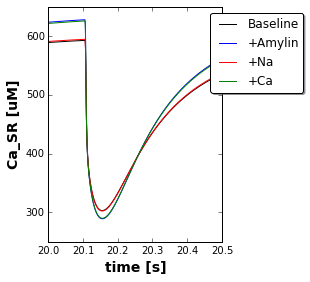

In [36]:

root="/net/share/shared/papers/despa/"
states = ["Ca_SR"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseAmylin1p25.data,data3=caseNaLeak.data,data4=caseCaLeak.data,
                          idxName=state, 
                          ylabel=state,trange=[20.0e3,20.5e3],
                          case1legend="Baseline",
                          case2legend="+Amylin",
                          case3legend="+Na",
                          case4legend="+Ca")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/CaNa_leak_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

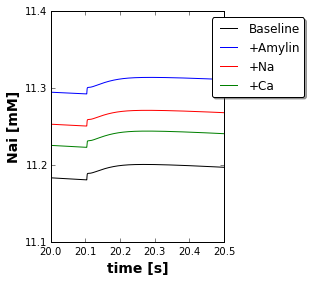

In [25]:

root="/net/share/shared/papers/despa/"
states = ["Nai"]
for i,state in enumerate(states):
        Plot4PickleData(caseExtended1Hz.data,data2=caseAmylin1p25.data,data3=caseNaLeak.data,data4=caseCaLeak.data,
                          idxName=state, 
                          ylabel=state,trange=[20.0e3,20.5e3],
                          case1legend="Baseline",
                          case2legend="+Amylin",
                          case3legend="+Na",
                          case4legend="+Ca")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/shared/papers/despa/CaNa_leak_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## NKA

## Control

In [49]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA_ctl = empty()
caseNKA_ctl.caseName = root+"mouse_NKA1p10x_freq1p0_60" 
caseNKA_ctl.fileName = caseNKA_ctl.caseName+".pickle"
caseNKA_ctl.data = ao.readPickle(caseNKA_ctl.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_NKA1p10x_freq1p0_60.pickle


In [50]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p2_ctl = empty()
caseNKA1p2_ctl.caseName = root+"mouse_NKA1p20x_freq1p0_60" 
caseNKA1p2_ctl.fileName = caseNKA1p2_ctl.caseName+".pickle"
caseNKA1p2_ctl.data = ao.readPickle(caseNKA1p2_ctl.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_NKA1p20x_freq1p0_60.pickle


In [51]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p3_ctl = empty()
caseNKA1p3_ctl.caseName = root+"mouse_NKA1p30x_freq1p0_60" 
caseNKA1p3_ctl.fileName = caseNKA1p3_ctl.caseName+".pickle"
caseNKA1p3_ctl.data = ao.readPickle(caseNKA1p3_ctl.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_NKA1p30x_freq1p0_60.pickle


In [14]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p4_ctl = empty()
caseNKA1p4_ctl.caseName = root+"mouse_NKA1p40x_freq1p0_60" 
caseNKA1p4_ctl.fileName = caseNKA1p4_ctl.caseName+".pickle"
caseNKA1p4_ctl.data = ao.readPickle(caseNKA1p4_ctl.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_NKA1p40x_freq1p0_60.pickle


In [58]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p5_ctl = empty()
caseNKA1p5_ctl.caseName = root+"mouse_NKA1p50x_freq1p0_60" 
caseNKA1p5_ctl.fileName = caseNKA1p5_ctl.caseName+".pickle"
caseNKA1p5_ctl.data = ao.readPickle(caseNKA1p5_ctl.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_NKA1p50x_freq1p0_60.pickle


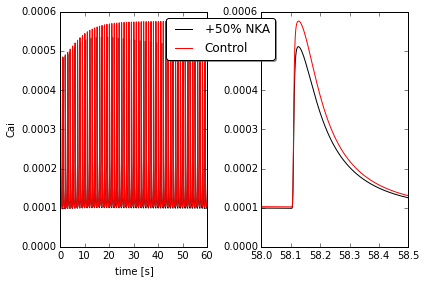

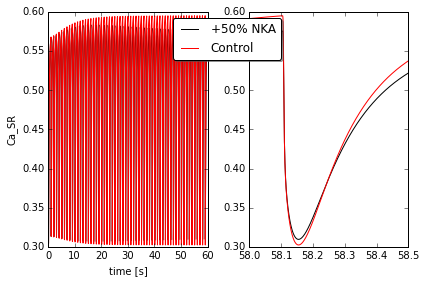

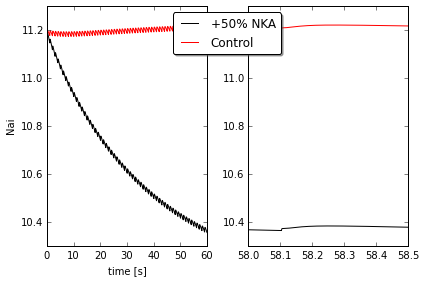

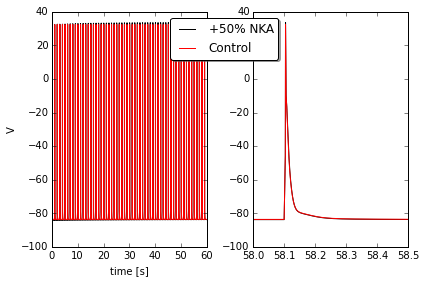

In [59]:
root="/net/share/shared/papers/despa/"
states = ["Cai","Ca_SR","Nai","V"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseNKA1p5_ctl.data,data2=caseExtended1Hz.data,
                          idxName=state, 
                          ylabel=state,trange=[58e3,58.5e3],
                          case1legend="+50% NKA",
                          case2legend="Control")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()

## UCD

In [ ]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA_ucd = empty()
caseNKA_ucd.caseName = root+"mouse_decrSERCA0p5_NKA1p10x_freq1p0_60" 
caseNKA_ucd.fileName = caseNKA_ucd.caseName+".pickle"
caseNKA_ucd.data = ao.readPickle(caseNKA_ucd.fileName) 

In [61]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p5_ucd = empty()
caseNKA1p5_ucd.caseName = root+"mouse_decrSERCA0p5_NKA1p50x_freq1p0_60" 
caseNKA1p5_ucd.fileName = caseNKA_ucd.caseName+".pickle"
caseNKA1p5_ucd.data = ao.readPickle(caseNKA_ucd.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCA0p5_NKA1p10x_freq1p0_60.pickle


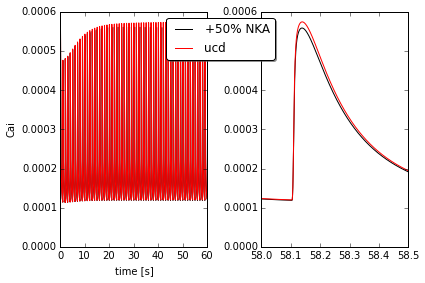

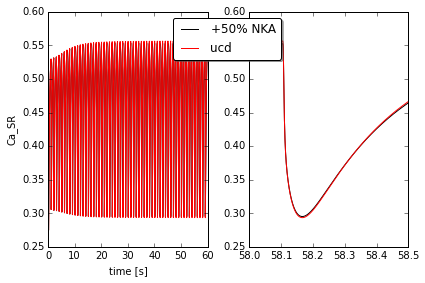

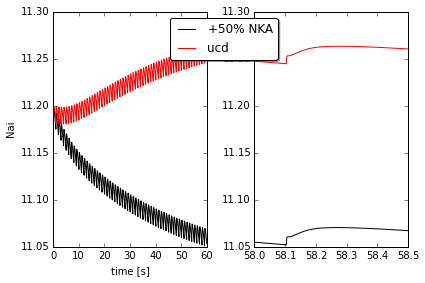

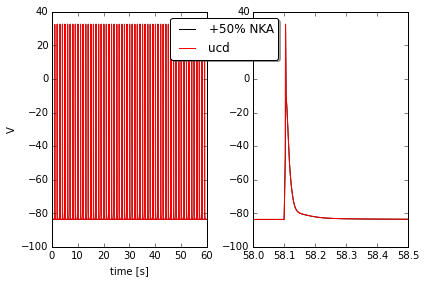

In [65]:
root="/net/share/shared/papers/despa/"
states = ["Cai","Ca_SR","Nai","V"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseNKA1p5_ucd.data,data2=caseSERCA0p5.data,
                          idxName=state, 
                          ylabel=state,trange=[58e3,58.5e3],
                          case1legend="+50% NKA",
                          case2legend="ucd")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()

## +Amy

In [52]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseNKA1p3_amy = empty()
caseNKA1p3_amy.caseName = root+"mouse_CaNaLeak1p25_NKA1p30x_freq1p0_60" 
caseNKA1p3_amy.fileName = caseNKA1p3_amy.caseName+".pickle"
caseNKA1p3_amy.data = ao.readPickle(caseNKA1p3_amy.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_CaNaLeak1p25_NKA1p30x_freq1p0_60.pickle


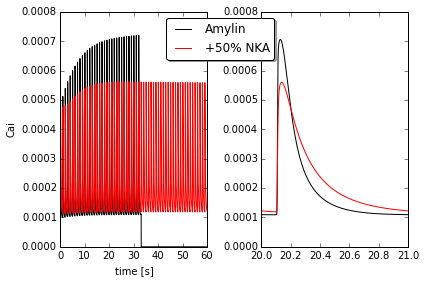

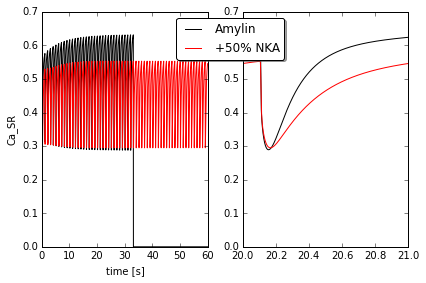

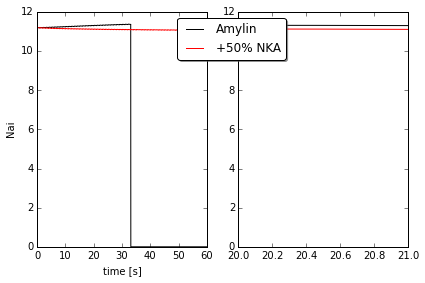

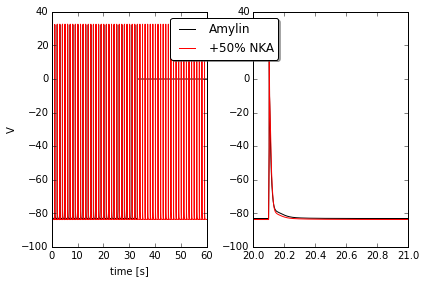

In [76]:
root="/net/share/shared/papers/despa/"
states = ["Cai","Ca_SR","Nai","V"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseAmylin1p25.data,data2=caseNKA1p5_ucd.data,
                          idxName=state, 
                          ylabel=state,trange=[20e3,21e3],
                          case1legend="Amylin",
                          case2legend="+50% NKA")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()

## All FOur

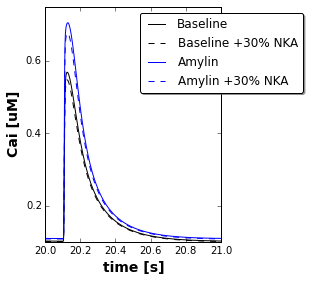

In [58]:
root="/net/share/shared/papers/despa/"
states = ["Cai"]
for i,state in enumerate(states):
        Plot4PickleDataNKA(caseExtended1Hz.data,data2=caseNKA1p3_ctl.data,data3=caseAmylin1p25.data,data4=caseNKA1p3_amy.data,
                          idxName=state, 
                          ylabel=state,trange=[20e3,21e3],
                          case1legend="Baseline",
                          case2legend="Baseline +30% NKA",
                          case3legend="Amylin",
                          case4legend="Amylin +30% NKA")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/NKA_Cai.png"
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

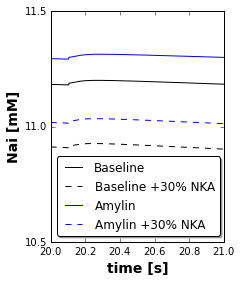

In [63]:
root="/net/share/shared/papers/despa/"
states = ["Nai"]
for i,state in enumerate(states):
        Plot4PickleDataNKA(caseExtended1Hz.data,data2=caseNKA1p3_ctl.data,data3=caseAmylin1p25.data,data4=caseNKA1p3_amy.data,
                          idxName=state, 
                          ylabel=state,trange=[20e3,21e3],
                          case1legend="Baseline",
                          case2legend="Baseline +30% NKA",
                          case3legend="Amylin",
                          case4legend="Amylin +30% NKA")
        plt.legend(loc=0,fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/NKA_Nai.png"
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

## Mouse vs. Rabbit

In [79]:
root="/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
caseRabbit = empty()
caseRabbit.caseName = root+"despa_baseline_freq1.0_5" 
caseRabbit.fileName = caseRabbit.caseName+".pickle"
caseRabbit.data = ao.readPickle(caseRabbit.fileName) 

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/despa_baseline_freq1.0_5.pickle


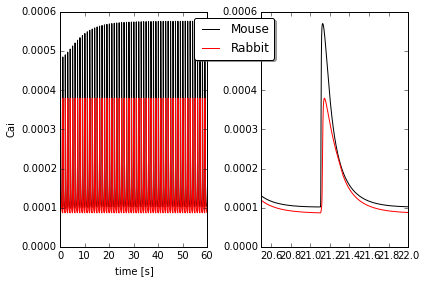

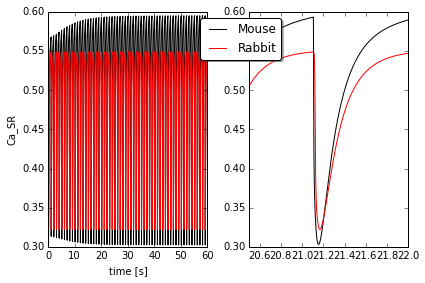

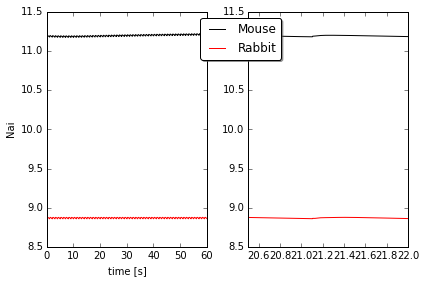

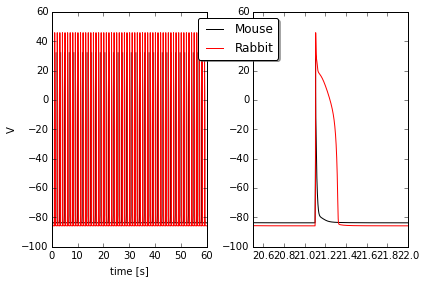

In [82]:
root="/net/share/shared/papers/despa/"
states = ["Cai","Ca_SR","Nai","V"]
for i,state in enumerate(states):
        ao.PlotPickleData(caseExtended1Hz.data,data2=caseRabbit.data,
                          idxName=state, 
                          ylabel=state,trange=[20.5e3,22e3],
                          case1legend="Mouse",
                          case2legend="Rabbit")
        plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()

In [62]:
def Plot4PickleDataNKA(data1,data2=None,data3=None,data4=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, case4legend=None,
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  mM_to_uM = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s'] #/ mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)
  if data4!=None:
    datac4 = mycont(data4)


  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'k--',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
    if data4!=None and datac4.v !=None:
      idx4 = datac4.v_idx.index(idxName)
    plt.plot(datac4.t,datac4.v[:,idx4],'b--',label=case4legend)
    plt.xlim(trange*ms_to_s)
#    plt.ylim(250,650)
    pyplot.locator_params(nbins=5)
    plt.legend(loc=0)
#    plt.ylim(0.10,0.75)
    plt.ylim(10.5,11.5)
#    plt.ylim(0.0,0.16)
#    plt.subplot(1,2,1)

#  if datac1.v !=None:
#    idx1 = datac1.v_idx.index(idxName)
#    plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
#  if data2!=None and datac2.v !=None:
#    idx2 = datac2.v_idx.index(idxName)
#    plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
#  if data3!=None and datac3.v !=None:
#    idx3 = datac3.v_idx.index(idxName)
#    plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
  plt.xlabel('time [s]', weight="bold",fontsize=14)
 # plt.ylabel(ylabel+" [uM]", weight="bold",fontsize=14)
  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14)
#  plt.legend(loc=3)
  plt.tight_layout()